### Automation of work in the browser:  `selenium` library

The `selenium` library is a set of tools for interactive work in the browser using Python. In general, Selenium is a whole project that has different tools. We will look at one of the most common ones ‒ Selenium WebDriver, a module that allows Python to be embedded in the browser and work in it as a user: click on links and buttons, fill out forms, select options in the menu, and so on. 

We will use WebDriver to solve this problem: You need to upload all the addresses of precinct election commissions in the Ivanovo region. 

First, download the web driver from the library `selenium`. 

In [1]:
#pip install selenium

In [2]:
#pip install fake_useragent

In [3]:
from selenium import webdriver # a robot that navigates pages in chrome
from selenium.webdriver.common.keys import Keys # input data in the "Search" field, click on the buttons

In [4]:
driver = webdriver.Chrome()

In [5]:
from fake_useragent import UserAgent
UserAgent().chrome

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'

In [6]:
import requests
from bs4 import BeautifulSoup
url = "http://cikrf.ru/digital-services/naydi-svoy-izbiratelnyy-uchastok/"
response = requests.get(url, headers={'User-Agent': UserAgent().chrome})

In [7]:
response

<Response [200]>

In [8]:
BeautifulSoup(response.text)

<!DOCTYPE html>
<html>
<head>
<title>Информирование об избирательных комиссиях и комиссиях референдума</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/bitrix/js/main/core/css/core.css?14822420448964" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/select2/select2.min.css?158973927217429" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/bootstrap/css/bootstrap.min.css?1589739273121200" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/viewbox/viewbox.css?15897392722692" rel="stylesheet" type="text/css"/>
<link href="/assets/css/cikrf/style.css?169341483949462" rel="stylesheet" type="text/css"/>
<link href="/digital-services/assets/css/style.css?162394612014343" rel="stylesheet" type="text/css"/>
<script type="text/javascript">if(!window.BX)window.BX={message:function(mess){if(typeof mess=='object') for(var i in

In [9]:
driver.get("http://cikrf.ru/digital-services/naydi-svoy-izbiratelnyy-uchastok/")

We open a page that interferes with viewing (something about users' personal data is written there). It should be closed. To close it, you need to tap on some clickable element, just as if you were physically opening this page. To find a clickable element, go to the page code, hover over the element you are interested in, and, for example, copy its XPath. What is XPath, you may ask. This is the path that you can use to find an element in an Xml or html marked-up document. For example, in a document like:

In [10]:
#XML Path ()
#HTML is a subset of XML (eXtensible Markup Language)
#RSS, XHTML, KML

    <tag1>
        <tag2>
            <tag3>
            </tag3>
        </tag2>
    </tag1>

Путь до tag3 будет иметь вид:

    /tag1/tag2/tag3

In [11]:
xpath = '/html/body/div[2]/div/div/button'
#indexing starts from 1 in html

In [12]:
fld = driver.find_element("xpath", '/html/body/div[2]/div/div/button')
fld.click()

Hooray, the page opened. We want to search by region and land plot number, so we need two fields. Save the section number to a variable `n_uik`, a region into `reg`.

In [13]:
n_uik = 244
reg = "Ивановская область"

Question: How do I fill in these two fields? You need to find them on the page opened in the browser and enter the necessary lines there. You only need to do this via Python. 

![](selenium1.png)

We need to find this element, just like last time:
Item Code -> Copy XPath

![](selenium2.png)

Now you need to click there

In [14]:
fld = driver.find_element("xpath", "/html/body/div[1]/div/div[2]/div/div[4]/form/div[1]/div[2]")
fld.click()

We finally got to the display of functionality with the selection of the PEC field and Region. To enter a region, click in the appropriate place. We've done this before:

In [15]:
fld = driver.find_element("xpath", '/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[1]/div/span/span[1]/span/span[2]')
fld.click()

In real life, we would then press ENTER. This is also possible here (last command)

In [16]:
# enter the name of the region in the field - метод send_keys
reg_field = driver.find_element('xpath', '/html/body/span/span/span[1]/input')
reg_field.send_keys(reg)

In [17]:
reg_field.send_keys(Keys.RETURN)

Now you need to select the site number. To do this, just enter the number we need in the field (so far we have 244)

![](selenium3.png)

That's it, we push our УИК into this field and try to search for it :)

In [18]:
# enter the УИК number in the field send_keys method
uik_field = driver.find_element("xpath", '/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[2]/div/input')
uik_field.click()
uik_field.send_keys(n_uik)

In [19]:
uik_field.send_keys(Keys.RETURN)

A page with the address of the polling station opened in the browser. 

![](selenium4.png)

In [20]:
driver.close()

In [21]:
driver = webdriver.Chrome()

In [22]:
from time import sleep

driver.get("http://www.cikrf.ru/services/lk_address/?do=find_by_uik")

fld = driver.find_element('xpath', "/html/body/div[2]/div/div/button")
fld.click()

sleep(1.5)

fld = driver.find_element('xpath', "/html/body/div[1]/div/div[2]/div/div[4]/form/div[1]/div[2]")
fld.click()

sleep(1.5)

fld = driver.find_element('xpath', '/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[1]/div/span/span[1]/span/span[2]')
fld.click()

sleep(1.5)

reg_field = driver.find_element('xpath', '/html/body/span/span/span[1]/input')
reg_field.send_keys(reg)

sleep(1.5)

reg_field.send_keys(Keys.RETURN)

sleep(1.5)

uik_field = driver.find_element('xpath', '/html/body/div[1]/div/div[2]/div/div[4]/form/div[3]/div[2]/div/input')
uik_field.click()
uik_field.send_keys(n_uik)

sleep(1.5)

uik_field.send_keys(Keys.RETURN)

All you have to do is upload the voting address. 

In [23]:
from bs4 import BeautifulSoup

In [24]:
my_page = BeautifulSoup(driver.page_source)

<html class="bx-mac bx-no-touch bx-retina bx-chrome bx-boxshadow bx-borderradius bx-flexwrap bx-boxdirection bx-transition bx-transform"><head>
<title>Информирование об избирательных комиссиях и комиссиях референдума</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/bitrix/js/main/core/css/core.css?14822420448964" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/select2/select2.min.css?158973927217429" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/bootstrap/css/bootstrap.min.css?1589739273121200" rel="stylesheet" type="text/css"/>
<link href="/local/templates/cikrf_v2_default/assets/vendor/viewbox/viewbox.css?15897392722692" rel="stylesheet" type="text/css"/>
<link href="/assets/css/cikrf/style.css?169341483949462" rel="stylesheet" type="text/css"/>
<link href="/digital-services/assets/css/style.css?162394612014343" rel="stylesheet" type="text/css"/>
<sc
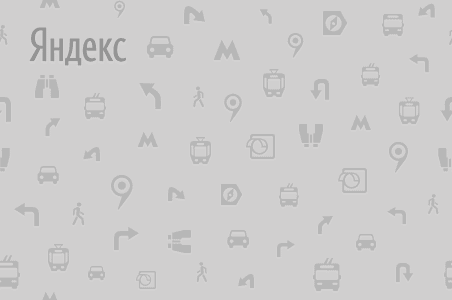
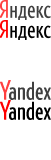
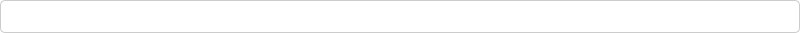
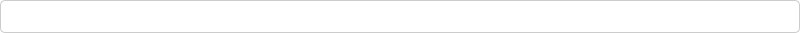
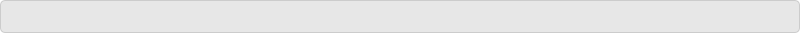
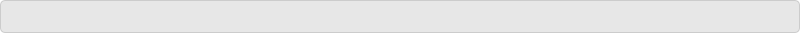
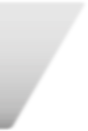
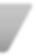
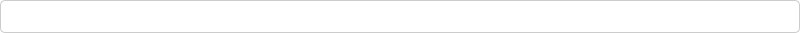
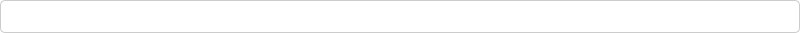
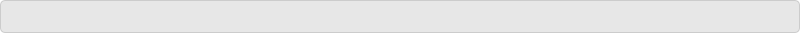
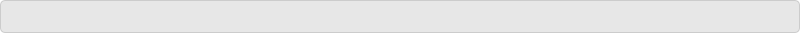
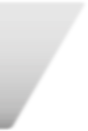
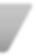
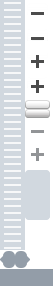
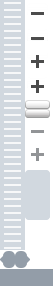
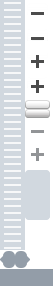
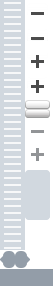
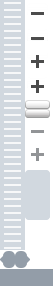

In [25]:
my_page

In [26]:
my_page.text

'\nИнформирование об избирательных комиссиях и комиссиях референдума\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nВерсия\n                                    для слабовидящих\nRSS\nEnglish version\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\nИзбиратели\n\n\n\n \n\nКандидаты и партии\n\n\n\n \n\nИзбирательные комиссии\n\n\n\n \n\nСМИ\n\n\n\n \n\nНаблюдатели и эксперты\n\n\n\n\n\n\n\n Общественная\n                                        приемная ЦИК\xa0России\n\nИзбиратели спрашивают – ЦИК\n                                                отвечает\n\nЭлектронная форма обращения\n\n\n\n Цифровые сервисы ЦИК\xa0России\n\n\n\n\nЧисленность избирателей\nПамятки для избирателей\n\n\n\n\nДля отдельных категорий\n                                        избирателей\n\nИзбирательные\n                                                права инвалидов\n\nИзбирательные\n                                                права военнослужащих\nИзбирательные\n                

In [27]:
address = [i.text for i in my_page.find_all('span', {'class':'address'})]

In [28]:
address

['',
 '',
 '155800, Ивановская область, город Кинешма, улица Григория Королева, дом 10, здание "Кинешемский политехнический колледж"',
 '155800, Ивановская область, город Кинешма, улица Григория Королева, дом 10, здание "Кинешемский политехнический колледж"']

In [29]:
#filter (for input: 1st argument condition for the filter, 2nd argument what to filter)
p = filter(lambda field: field not in ('', None), 
[i.text for i in my_page.find_all('span',{'class':'address'})])

In [30]:
def filt(address):
    for i in address:
        if i not in ('', None):
            return True
        else:
            return False

In [31]:
p2 = filter(filt, 
[i.text for i in my_page.find_all('span',{'class':'address'})])

In [32]:
p2 = next(p2)

In [33]:
p2

'155800, Ивановская область, город Кинешма, улица Григория Королева, дом 10, здание "Кинешемский политехнический колледж"'

In [34]:
range(1, 10)

range(1, 10)

In [35]:
p

In [36]:
#анонимная функция lambda x:

In [37]:
p = next(p)

In [38]:
p

'155800, Ивановская область, город Кинешма, улица Григория Королева, дом 10, здание "Кинешемский политехнический колледж"'

It worked! The only thing is that it would be good to take into account cases when the site address is not displayed in this form on the page (there are such cases: sometimes the page is not created according to a template, sometimes the address of the territorial commission is indicated). To do this, we need a condition. Let's add a "fork": let Python try to find the address using the specified regular expression, and if it doesn't find it, then look for it using another regular expression. 

In [39]:
if p is None or p=='':
    p = 'Адреса не нашлось'
p

'155800, Ивановская область, город Кинешма, улица Григория Королева, дом 10, здание "Кинешемский политехнический колледж"'

Now we have a universal code that allows you to find the address of a polling station by phone number. Next time, we will formalize this code into a function so that you can insert any number and region into it, and apply it in a loop, iterating by section numbers.

In [40]:
driver.close()